Conjunctivits Prediction using Machine Learning

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving MajorProject1.zip to MajorProject1.zip


In [ ]:
import zipfile

zip_filename = 'MajorProject1.zip'

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall('Directory')

Training and Testing Dataset

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
def preprocess_images(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpeg"):
            img_path = os.path.join(folder_path, filename)
            img = load_img(img_path, target_size=IMAGE_SIZE)
            img_array = img_to_array(img)
            img_array /= 255.0
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)
conjunctivitis_images, conjunctivitis_labels = preprocess_images("/content/Directory/MajorProject/dataset/conjunctivitis", 1)
non_conjunctivitis_images, non_conjunctivitis_labels = preprocess_images("/content/Directory/MajorProject/dataset/non_conjunctivitis", 0)
all_images = np.concatenate((conjunctivitis_images, non_conjunctivitis_images), axis=0)
all_labels = np.concatenate((conjunctivitis_labels, non_conjunctivitis_labels), axis=0)
train_images, test_images, train_labels, test_labels = train_test_split(
    all_images, all_labels, test_size=0.2, random_state=42
)

print("Train Images Shape:", train_images.shape)
print("Train Labels Shape:", train_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)


Train Images Shape: (81, 224, 224, 3)
Train Labels Shape: (81,)
Test Images Shape: (21, 224, 224, 3)
Test Labels Shape: (21,)


Random Forest Model

In [ ]:
import os
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load your dataset and labels (replace this with your actual implementation)
def load_data(conjunctivitis_folder, non_conjunctivitis_folder):
    data = []
    labels = []

    # Load conjunctivitis images
    for filename in os.listdir(conjunctivitis_folder):
        img_path = os.path.join(conjunctivitis_folder, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV reads images in BGR format
        img = cv2.resize(img, (64, 64))  # Adjust the size as needed
        data.append(img.flatten())  # Flatten the image into a vector
        labels.append(1)  # Label 1 for conjunctivitis

    # Load non-conjunctivitis images
    for filename in os.listdir(non_conjunctivitis_folder):
        img_path = os.path.join(non_conjunctivitis_folder, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV reads images in BGR format
        img = cv2.resize(img, (64, 64))  # Adjust the size as needed
        data.append(img.flatten())  # Flatten the image into a vector
        labels.append(0)  # Label 0 for non-conjunctivitis

    return np.array(data), np.array(labels)

# Load images and labels
conjunctivitis_folder ='/content/Directory/MajorProject/dataset/conjunctivitis'
non_conjunctivitis_folder = '/content/Directory/MajorProject/dataset/non_conjunctivitis'
data, labels = load_data(conjunctivitis_folder, non_conjunctivitis_folder)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Standardize the features (optional but can be beneficial for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
RF_accuracy = accuracy_score(y_test, y_pred)
print("Random Forest")
print(f'Accuracy: {RF_accuracy}')

# Print classification report
print(classification_report(y_test, y_pred))



Random Forest
Accuracy: 0.7586206896551724
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.73      0.79      0.76        14

    accuracy                           0.76        29
   macro avg       0.76      0.76      0.76        29
weighted avg       0.76      0.76      0.76        29



KNN Model

In [ ]:
import os
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load your dataset and labels (replace this with your actual implementation)
def load_data(conjunctivitis_folder, non_conjunctivitis_folder):
    data = []
    labels = []

    # Load conjunctivitis images
    for filename in os.listdir(conjunctivitis_folder):
        img_path = os.path.join(conjunctivitis_folder, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV reads images in BGR format
        img = cv2.resize(img, (64, 64))  # Adjust the size as needed
        data.append(img.flatten())  # Flatten the image into a vector
        labels.append(1)  # Label 1 for conjunctivitis

    # Load non-conjunctivitis images
    for filename in os.listdir(non_conjunctivitis_folder):
        img_path = os.path.join(non_conjunctivitis_folder, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV reads images in BGR format
        img = cv2.resize(img, (64, 64))  # Adjust the size as needed
        data.append(img.flatten())  # Flatten the image into a vector
        labels.append(0)  # Label 0 for non-conjunctivitis

    return np.array(data), np.array(labels)

# Load images and labels
conjunctivitis_folder ='/content/Directory/MajorProject/dataset/conjunctivitis'
non_conjunctivitis_folder = '/content/Directory/MajorProject/dataset/non_conjunctivitis'
data, labels = load_data(conjunctivitis_folder, non_conjunctivitis_folder)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=8)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
KNN_accuracy = accuracy_score(y_test, y_pred)
print("K-Nearest neighbours")
print(f'Accuracy: {KNN_accuracy}')

# Print classification report
print(classification_report(y_test, y_pred))


K-Nearest neighbours
Accuracy: 0.6896551724137931
              precision    recall  f1-score   support

           0       0.69      0.73      0.71        15
           1       0.69      0.64      0.67        14

    accuracy                           0.69        29
   macro avg       0.69      0.69      0.69        29
weighted avg       0.69      0.69      0.69        29



Decision Tree Model



In [ ]:
import os
import cv2
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset and labels (replace this with your actual implementation)
def load_data(conjunctivitis_folder, non_conjunctivitis_folder):
    data = []
    labels = []

    # Load conjunctivitis images
    for filename in os.listdir(conjunctivitis_folder):
        img_path = os.path.join(conjunctivitis_folder, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV reads images in BGR format
        img = cv2.resize(img, (64, 64))  # Adjust the size as needed
        data.append(img.flatten())  # Flatten the image into a vector
        labels.append(1)  # Label 1 for conjunctivitis

    # Load non-conjunctivitis images
    for filename in os.listdir(non_conjunctivitis_folder):
        img_path = os.path.join(non_conjunctivitis_folder, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV reads images in BGR format
        img = cv2.resize(img, (64, 64))  # Adjust the size as needed
        data.append(img.flatten())  # Flatten the image into a vector
        labels.append(0)  # Label 0 for non-conjunctivitis

    return np.array(data), np.array(labels)

# Load images and labels
conjunctivitis_folder = '/content/Directory/MajorProject/dataset/conjunctivitis'
non_conjunctivitis_folder =  '/content/Directory/MajorProject/dataset/non_conjunctivitis'
data, labels = load_data(conjunctivitis_folder, non_conjunctivitis_folder)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
decision_tree_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_classifier.predict(X_test)

# Evaluate the model
DT_accuracy = accuracy_score(y_test, y_pred)
print('Decision Tree:')
print(f'Accuracy: {DT_accuracy}')

# Print classification report
print(classification_report(y_test, y_pred))


Decision Tree:
Accuracy: 0.6551724137931034
              precision    recall  f1-score   support

           0       0.69      0.60      0.64        15
           1       0.62      0.71      0.67        14

    accuracy                           0.66        29
   macro avg       0.66      0.66      0.65        29
weighted avg       0.66      0.66      0.65        29



CNN Model

Epoch 1/40
2/2 [==============================] - 9s 4s/step - loss: 0.9127 - accuracy: 0.5000 - val_loss: 11.4728 - val_accuracy: 0.5882
Epoch 2/40
2/2 [==============================] - 10s 5s/step - loss: 9.4500 - accuracy: 0.6094 - val_loss: 4.2368 - val_accuracy: 0.5882
Epoch 3/40
2/2 [==============================] - 8s 4s/step - loss: 2.9006 - accuracy: 0.6094 - val_loss: 1.0799 - val_accuracy: 0.4118
Epoch 4/40
2/2 [==============================] - 8s 5s/step - loss: 0.6439 - accuracy: 0.6875 - val_loss: 0.7488 - val_accuracy: 0.5882
Epoch 5/40
2/2 [==============================] - 7s 3s/step - loss: 0.4981 - accuracy: 0.7500 - val_loss: 0.6299 - val_accuracy: 0.5882
Epoch 6/40
2/2 [==============================] - 5s 3s/step - loss: 0.4223 - accuracy: 0.8125 - val_loss: 0.7347 - val_accuracy: 0.5882
Epoch 7/40
2/2 [==============================] - 6s 3s/step - loss: 0.4147 - accuracy: 0.7656 - val_loss: 0.5110 - val_accuracy: 0.8824
Epoch 8/40
2/2 [=======================

1/1 [==============================] - 0s 489ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Confusion Matrix:
[[ 8  0]
 [ 3 10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       1.00      0.77      0.87        13

    accuracy                           0.86        21
   macro avg       0.86      0.88      0.86        21
weighted avg       0.90      0.86      0.86        21



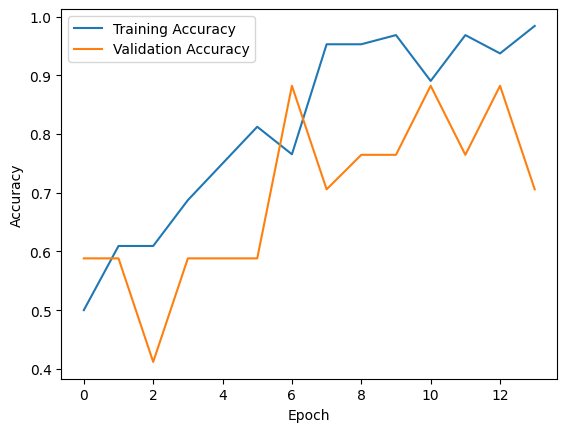

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Define the CNN model

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


history = model.fit(
    train_images, train_labels,
    epochs=40,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    callbacks=[early_stopping]
)


test_loss, CNN_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {CNN_accuracy}')
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Assuming 'test_images' contains your test data and 'test_labels' contains the true labels

# Predict labels using the trained model
predictions = model.predict(test_images)
predicted_labels = np.round(predictions).flatten()

# Convert to binary labels (0 or 1)
test_labels_binary = np.round(test_labels).flatten()

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_labels_binary, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("\nClassification Report:")
print(classification_report(test_labels_binary, predicted_labels))


model.save('conjunctivitis_model.h5')

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Multi-CNN Model

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import cv2
import os
from sklearn.metrics import classification_report

# Load and preprocess data
def load_data(directory):
    X = []
    y = []

    for folder in os.listdir(directory):
        label = 1 if folder == 'conjunctivitis' else 0
        for file in os.listdir(os.path.join(directory, folder)):
            img = cv2.imread(os.path.join(directory, folder, file))
            img = cv2.resize(img, (150, 150))  # Resize image
            img = img / 255.0  # Normalize image
            X.append(img)
            y.append(label)

    X = np.array(X)
    y = np.array(y)

    return X, y

# Define different CNN models
def create_model1(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(128, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model
def create_model2(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model
def create_model3(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

directory = "/content/Directory/MajorProject/dataset"
X, y = load_data(directory)
input_shape = X.shape[1:]


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=50)

# Train different CNN models
model1 = create_model1(input_shape)
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

model2 = create_model2(input_shape)
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

model3= create_model3(input_shape)
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))


predictions_model1 = np.round(model1.predict(X_test))
predictions_model2 = np.round(model2.predict(X_test))
predictions_model3 = np.round(model3.predict(X_test))

# Ensemble by voting
ensemble_predictions = np.round((predictions_model1 + predictions_model2 + predictions_model3) / 5)

ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)

print("Ensemble Accuracy:", ensemble_accuracy)
print(classification_report(y_test, ensemble_predictions))


Epoch 1/20
4/4 [==============================] - 7s 1s/step - loss: 8.0375 - accuracy: 0.4821 - val_loss: 9.0760 - val_accuracy: 0.3571
Epoch 2/20
4/4 [==============================] - 6s 2s/step - loss: 4.6955 - accuracy: 0.5089 - val_loss: 1.4017 - val_accuracy: 0.6429
Epoch 3/20
4/4 [==============================] - 5s 1s/step - loss: 1.9964 - accuracy: 0.5179 - val_loss: 0.7400 - val_accuracy: 0.5714
Epoch 4/20
4/4 [==============================] - 6s 1s/step - loss: 0.9794 - accuracy: 0.5625 - val_loss: 0.6637 - val_accuracy: 0.6429
Epoch 5/20
4/4 [==============================] - 5s 1s/step - loss: 0.4761 - accuracy: 0.7500 - val_loss: 0.7840 - val_accuracy: 0.4286
Epoch 6/20
4/4 [==============================] - 5s 1s/step - loss: 0.3655 - accuracy: 0.8393 - val_loss: 0.5262 - val_accuracy: 0.7857
Epoch 7/20
4/4 [==============================] - 6s 1s/step - loss: 0.2745 - accuracy: 0.9018 - val_loss: 0.6599 - val_accuracy: 0.5714
Epoch 8/20
4/4 [=========================

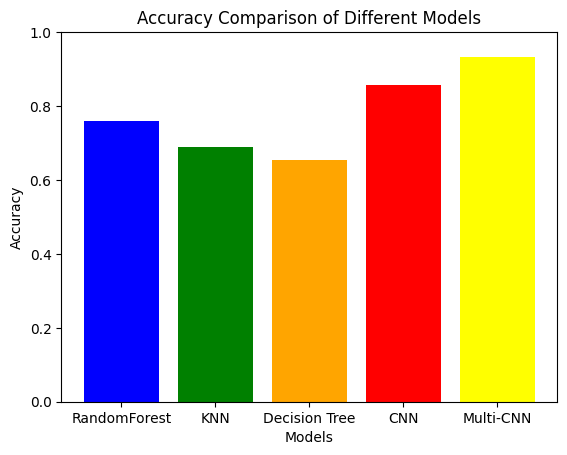

In [20]:
import matplotlib.pyplot as plt
models = ['RandomForest', 'KNN','Decision Tree','CNN','Multi-CNN']
accuracies = [RF_accuracy,KNN_accuracy,DT_accuracy,CNN_accuracy,ensemble_accuracy]

plt.bar(models, accuracies, color=['blue','green','orange','red','yellow'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)
plt.show()

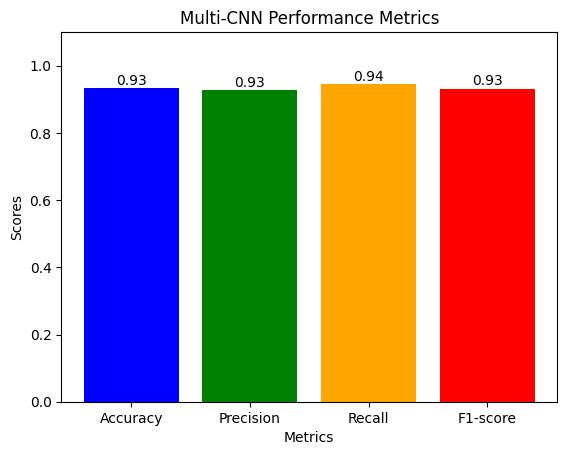

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

# Assuming ensemble_predictions and y_test are defined from your code
report = classification_report(y_test, ensemble_predictions, output_dict=True)

# Extracting metrics
accuracy = report['accuracy']
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
f1_score = report['macro avg']['f1-score']

# Plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1_score]

fig, ax = plt.subplots()
ax.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])

# Adding values on top of the bars
for i, v in enumerate(values):
    ax.text(i, v + 0.01, str(round(v, 2)), ha='center')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Multi-CNN Performance Metrics')
plt.ylim(0, 1.1)
plt.show()


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Function to preprocess a single image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=IMAGE_SIZE)
    img_array = img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Load your trained model
model = load_model("conjunctivitis_model.h5")  # Replace with the correct model file path

# Path to the new image you want to test
new_image_path1 = "/content/conjunctivitis_006.jpg"
new_image_path2 = "/content/conjunctivitis_025.jpeg"
new_image_path3 = "/content/non_conjunctivitis_003.jpg"
new_image_path4 = "/content/non_conjunctivitis_015.jpeg"
new_image_path5 = "/content/conjunctivitis_024.jpg"
new_image_path6 = "/content/conjunctivitis_059.jpeg"
new_image_path7 = "/content/non_conjunctivitis_021.jpg"
new_image_path8 = "/content/non_conjunctivitis_027.jpeg"

# Preprocess the new image
new_image1 = preprocess_image(new_image_path1)
new_image2 = preprocess_image(new_image_path2)
new_image3 = preprocess_image(new_image_path3)
new_image4 = preprocess_image(new_image_path4)
new_image5 = preprocess_image(new_image_path5)
new_image6 = preprocess_image(new_image_path6)
new_image7 = preprocess_image(new_image_path7)
new_image8 = preprocess_image(new_image_path8)

# Make a prediction
prediction1= model.predict(new_image1)
prediction2= model.predict(new_image2)
prediction3= model.predict(new_image3)
prediction4= model.predict(new_image4)
prediction5= model.predict(new_image5)
prediction6= model.predict(new_image6)
prediction7= model.predict(new_image7)
prediction8= model.predict(new_image8)
print(prediction1)
print(prediction2)
print(prediction3)
print(prediction4)
print(prediction5)
print(prediction6)
print(prediction7)
print(prediction8)
# Convert the prediction to binary value based on a threshold
threshold = 0.5
binary_prediction1 = (prediction1 > threshold).astype(int)
binary_prediction2 = (prediction2 > threshold).astype(int)
binary_prediction3 = (prediction3 > threshold).astype(int)
binary_prediction4 = (prediction4 > threshold).astype(int)
binary_prediction5 = (prediction5 > threshold).astype(int)
binary_prediction6 = (prediction6 > threshold).astype(int)
binary_prediction7 = (prediction7 > threshold).astype(int)
binary_prediction8 = (prediction8 > threshold).astype(int)

# Print the prediction result
print(f"Predicted: {binary_prediction1[0][0]} (Probability: {prediction1[0][0]:.4f})")
print(f"Predicted: {binary_prediction2[0][0]} (Probability: {prediction2[0][0]:.4f})")
print(f"Predicted: {binary_prediction3[0][0]} (Probability: {prediction3[0][0]:.4f})")
print(f"Predicted: {binary_prediction4[0][0]} (Probability: {prediction4[0][0]:.4f})")
print(f"Predicted: {binary_prediction5[0][0]} (Probability: {prediction5[0][0]:.4f})")
print(f"Predicted: {binary_prediction6[0][0]} (Probability: {prediction6[0][0]:.4f})")
print(f"Predicted: {binary_prediction7[0][0]} (Probability: {prediction7[0][0]:.4f})")
print(f"Predicted: {binary_prediction8[0][0]} (Probability: {prediction8[0][0]:.4f})")


1/1 [==============================] - 0s 82ms/step
[[0.87946665]]
[[0.9958869]]
[[0.2734496]]
[[0.08234882]]
[[0.9919105]]
[[0.99883455]]
[[0.0398828]]
[[0.02113774]]
Predicted: 1 (Probability: 0.8795)
Predicted: 1 (Probability: 0.9959)
Predicted: 0 (Probability: 0.2734)
Predicted: 0 (Probability: 0.0823)
Predicted: 1 (Probability: 0.9919)
Predicted: 1 (Probability: 0.9988)
Predicted: 0 (Probability: 0.0399)
Predicted: 0 (Probability: 0.0211)


In [ ]:
import tensorflow as tf

# Load your Keras model
model = tf.keras.models.load_model('conjunctivitis_model.h5')

# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model to a .tflite file
with open('conjunctivitis_model.tflite', 'wb') as f:
    f.write(tflite_model)
